In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from aeon.visualisation import plot_critical_difference

In [2]:
dfs = []
for file in tqdm(glob("res_tmp/*/*.csv")):
    df = pd.read_csv(file)
    dataset_name = file.split('/')[-1].split('|')[0]
    df['dataset'] = dataset_name
    if dataset_name in ['wine', 'ionosphere']:
        continue
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

df_original = df.copy()

df

  0%|          | 0/44963 [00:00<?, ?it/s]

,max_depth,prune_useless_leaves,stump_selection,random_state,splitter,base_stumps,distance_measure,method,PartialPivotTreeStumpClassifier,train_time,...,precision_macro_val,precision_weighted_val,recall_score_val,recall_micro_val,recall_macro_val,recall_weighted_val,n_leaf_val,n_nodes_val,resulting_max_depth_val,dataset
0,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",0.078726,...,0.705793,0.749001,0.744000,0.744000,0.703889,0.744000,6.4,5.4,4.0,vertebral
1,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 0.5...",0.669276,...,0.656845,0.696908,0.692000,0.692000,0.651111,0.692000,7.2,6.2,4.0,vertebral
2,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 1000, 'n_ts_for_selection': 10...",0.382313,...,0.814610,0.838591,0.836000,0.836000,0.807778,0.836000,7.2,6.2,4.0,vertebral
3,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': inf...",1.250720,...,0.674522,0.722311,0.716000,0.716000,0.671111,0.716000,7.0,6.0,4.0,vertebral
4,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",0.001497,...,0.160000,0.230400,0.480000,0.480000,0.333333,0.480000,1.0,0.0,1.0,vertebral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42070,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 10, 'n_ts_for_selection': 1000...",0.087941,...,0.885813,0.884897,0.864706,0.864706,0.865152,0.864706,6.0,5.0,4.0,seeds
42071,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 100, 'n_ts_for_selection': 10,...",0.333653,...,0.879497,0.878868,0.864706,0.864706,0.865152,0.864706,5.0,4.0,4.0,seeds
42072,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 10, 'n_ts_for_selection': inf,...",0.001566,...,0.107843,0.104671,0.323529,0.323529,0.333333,0.323529,1.0,0.0,1.0,seeds
42073,3,True,best,42,best,['PartialPivotTreeStumpClassifier'],euclidean,SPT,"{'n_shapelets': 10, 'n_ts_for_selection': 100,...",8.620382,...,0.854922,0.853277,0.847059,0.847059,0.846970,0.847059,6.6,5.6,4.0,seeds


In [8]:
lista_dataset = [
    'iris',
    'vertebral',
    'home',
    'auction',
    'seeds',
    'ecoli',
    'bankMarketing',
    'magic',
    'diabetes',
    'titanic',
    'glass', 
    'covertype'
]

df = df[df.dataset.isin(lista_dataset)].copy(deep=True)

In [9]:
df.dataset.unique()

array(['vertebral', 'glass', 'auction', 'diabetes', 'titanic', 'ecoli',
       'home', 'magic', 'covertype', 'bankMarketing', 'iris', 'seeds'],
      dtype=object)

In [10]:
df.columns

Index(['max_depth', 'prune_useless_leaves', 'stump_selection', 'random_state',
       'splitter', 'base_stumps', 'distance_measure', 'method',
       'PartialPivotTreeStumpClassifier', 'train_time', 'pred_time',
       'train_mem_MB', 'pred_mem_MB', 'accuracy_test',
       'balanced_accuracy_test', 'f1_score_test', 'f1_micro_test',
       'f1_macro_test', 'f1_weighted_test', 'precision_score_test',
       'precision_micro_test', 'precision_macro_test',
       'precision_weighted_test', 'recall_score_test', 'recall_micro_test',
       'recall_macro_test', 'recall_weighted_test', 'n_leaf_test',
       'n_nodes_test', 'resulting_max_depth_test', 'accuracy_val',
       'balanced_accuracy_val', 'f1_score_val', 'f1_micro_val', 'f1_macro_val',
       'f1_weighted_val', 'precision_score_val', 'precision_micro_val',
       'precision_macro_val', 'precision_weighted_val', 'recall_score_val',
       'recall_micro_val', 'recall_macro_val', 'recall_weighted_val',
       'n_leaf_val', 'n_nodes_val',

In [11]:
df['n_features_strategy'] = df.PartialPivotTreeStumpClassifier\
            .apply(lambda x: x[x.index('n_features_strategy')+22:].split(',')[0] if not pd.isna(x) else "")
df['selection'] = df.PartialPivotTreeStumpClassifier.apply(lambda x: x[x.index('\'selection')+12:].split(',')[0] if not pd.isna(x) else "")
df['n_ts_for_selection'] = df.PartialPivotTreeStumpClassifier.apply(lambda x: x[x.index('selection')+12:].split(',')[0] if not pd.isna(x) else "")
df['n_shapelets'] = df.PartialPivotTreeStumpClassifier.apply(lambda x: x[x.index('n_shapelets')+14:].split(',')[0] if not pd.isna(x) else "")
df['scaler'] = df.PartialPivotTreeStumpClassifier.apply(lambda x: x[x.index('scaler')+9:].split(',')[0] if not pd.isna(x) else "")

In [12]:
df.selection = df.selection.apply(lambda x: x.replace('_', ''))
df.n_features_strategy = df.n_features_strategy.apply(lambda x: x.replace('_', ''))
df.n_ts_for_selection = df.n_ts_for_selection.apply(lambda x: x.replace('_', ''))
df.n_shapelets = df.n_shapelets.apply(lambda x: x.replace('_', ''))
df.scaler = df.scaler.apply(lambda x: x.replace('_', '').replace('()', ''))

In [13]:
scaler_priority = {
    'None': 0,
    'MinMaxScaler': 1,
    'MaxAbsScaler': 2,
    'StandardScaler': 3,
    'RobustScaler': 4,
}

In [137]:
def prepare_for_cd_plot(df, sort_cols, group_cols, pivot_cols, dropna=True, lower_better=False, verbose=False):
    sort_cols = sort_cols if type(sort_cols) == list else [sort_cols]
    group_cols = group_cols if type(group_cols) == list else [group_cols]
    pivot_cols = pivot_cols if type(pivot_cols) == list else [pivot_cols]
    
    df_aeon = df.sort_values(by=["dataset", "method"]+sort_cols+group_cols, ascending=False)\
                .groupby(["dataset", "method"]+group_cols).head(1)

    df_aeon = df_aeon.pivot(index=['dataset'], columns=[x.replace('!rm', '') for x in group_cols], values=pivot_cols)

    if type(dropna)==bool and dropna:
        df_aeon.dropna(inplace=True)
    else:
        df_aeon.fillna(dropna, inplace=True)

    if verbose: display(df_aeon.T.sort_index())
    
    df_aeon.columns = ['_'.join([str(_x) for _x in x[1:]]) for x in df_aeon.columns]
    fig, ax = plot_critical_difference(df_aeon.values, 
                                       labels=[x.replace('Scaler', '').replace('Standard', 'Std') for x in df_aeon.columns], 
                                       lower_better=lower_better, textspace=1.1,
                                       alpha=.1, test='nemenyi', width=4)
    plt.title(f'{pivot_cols}: {group_cols}')
    
    return (df_aeon.dropna() if dropna else df_aeon), (fig, ax)
                

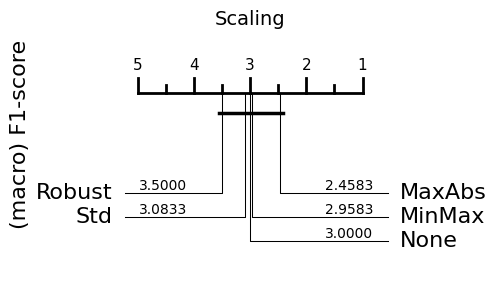

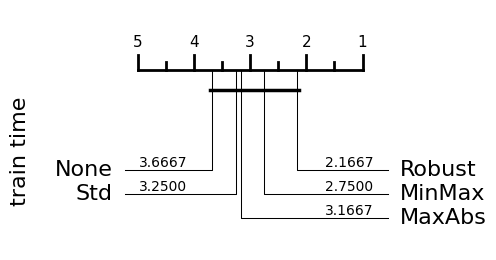

In [149]:
df0 = df.copy(deep=True)

df0['scaler!rm'] = df0.scaler.apply(lambda x: -scaler_priority[x])

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'scaler!rm', 'f1_macro_test')
plt.title("Scaling", fontsize=14)
plt.text(.02, .8, '(macro) F1-score', rotation='vertical', fontsize=16)
plt.savefig("z_img_1Selective_scaler_F1.png", dpi=300, bbox_inches='tight', )
plt.show()

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'scaler!rm', 'train_time', lower_better=True)
plt.text(.02, .8, 'train time', rotation='vertical', fontsize=16)
plt.title('')
plt.savefig("z_img_1Selective_scaler_traintime.png", dpi=300, bbox_inches='tight', )
plt.show()

In [120]:
def prepare_for_cd_plot(df, sort_cols, group_cols, pivot_cols, dropna=True, lower_better=False, verbose=False):
    sort_cols = sort_cols if type(sort_cols) == list else [sort_cols]
    group_cols = group_cols if type(group_cols) == list else [group_cols]
    pivot_cols = pivot_cols if type(pivot_cols) == list else [pivot_cols]
    
    df_aeon = df.sort_values(by=["dataset", "method"]+sort_cols+group_cols, ascending=False)\
                .groupby(["dataset", "method"]+group_cols).head(1)

    df_aeon = df_aeon.pivot(index=['dataset'], columns=[x.replace('!rm', '') for x in group_cols], values=pivot_cols)

    if type(dropna)==bool and dropna:
        df_aeon.dropna(inplace=True)
    else:
        df_aeon.fillna(dropna, inplace=True)

    if verbose: display(df_aeon.T.sort_index())
    
    df_aeon.columns = ['_'.join([str(_x) for _x in x[1:]]) for x in df_aeon.columns]
    fig, ax = plot_critical_difference(df_aeon.values, 
                                       labels=[x.replace('\'', '').strip() for x in df_aeon.columns], 
                                       lower_better=lower_better, textspace=1.1,
                                       alpha=.1, test='nemenyi', width=4)
    plt.title(f'{pivot_cols}: {group_cols}')
    
    return (df_aeon.dropna() if dropna else df_aeon), (fig, ax)

['$R_{k=100}$' '$C_{k=100}$' '$C_{k=10}$' '$R_{k=10}$' '$A_{k=1k}$'
 '$C_{k=inf}$' '$R_{k=inf}$' '$C_{k=1k}$' '$A_{k=inf}$' '$A_{k=10}$'
 '$R_{k=1k}$' '$A_{k=100}$']


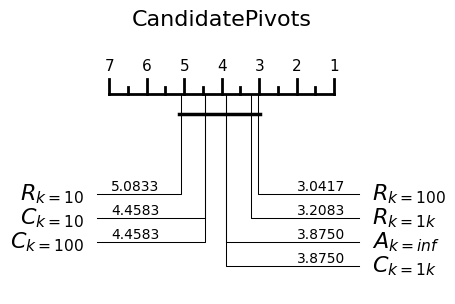

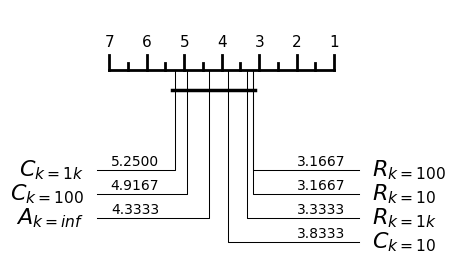

In [121]:
df0 = df.copy(deep=True)

df0 = df0[
    (df0.scaler.isin(['None', 'MinMaxScaler', 'StandardScaler']))
]

df0['selection_k'] = '$'+ df.selection.apply(lambda x: x[2:3].upper())+'_{k='+df.n_shapelets.apply(lambda x: '1k' if x == '1000' else x)+'}$'

print(df0.selection_k.unique())

to_exclude = [
    "$A_{k=1k}$", "$C_{k=inf}$",  "$R_{k=inf}$", "$A_{k=10}$", "$A_{k=100}$"
]

df0 = df0[df0.selection_k.apply(lambda x: x not in to_exclude)]

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'selection_k', 'f1_macro_test')
plt.title("CandidatePivots", fontsize=16)
plt.savefig("z_img_1Selective_candidatePivot_F1.png", dpi=300, bbox_inches='tight', )
plt.show()

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'selection_k', 'train_time', lower_better=True)
plt.title('')
plt.savefig("z_img_1Selective_candidatePivot_traintime.png", dpi=300, bbox_inches='tight', )
plt.show()

In [152]:
def prepare_for_cd_plot(df, sort_cols, group_cols, pivot_cols, dropna=True, lower_better=False, verbose=False):
    sort_cols = sort_cols if type(sort_cols) == list else [sort_cols]
    group_cols = group_cols if type(group_cols) == list else [group_cols]
    pivot_cols = pivot_cols if type(pivot_cols) == list else [pivot_cols]
    
    df_aeon = df.sort_values(by=["dataset", "method"]+sort_cols+group_cols, ascending=False)\
                .groupby(["dataset", "method"]+group_cols).head(1)

    df_aeon = df_aeon.pivot(index=['dataset'], columns=[x.replace('!rm', '') for x in group_cols], values=pivot_cols)

    if type(dropna)==bool and dropna:
        df_aeon.dropna(inplace=True)
    else:
        df_aeon.fillna(dropna, inplace=True)

    if verbose: display(df_aeon.T.sort_index())
    
    df_aeon.columns = ['_'.join([str(_x) for _x in x[1:]]) for x in df_aeon.columns]
    fig, ax = plot_critical_difference(df_aeon.values, 
                                       labels=[x.replace('\'', '').strip() for x in df_aeon.columns], 
                                       lower_better=lower_better, textspace=1.1,
                                       alpha=.1, test='nemenyi', width=4)
    plt.title(f'{pivot_cols}: {group_cols}')
    
    return (df_aeon.dropna() if dropna else df_aeon), (fig, ax)

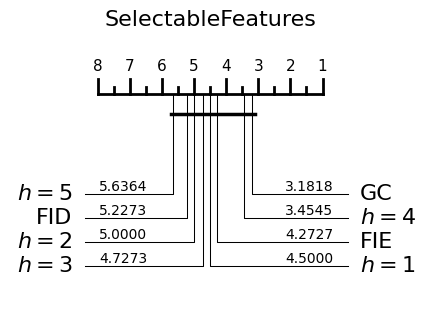

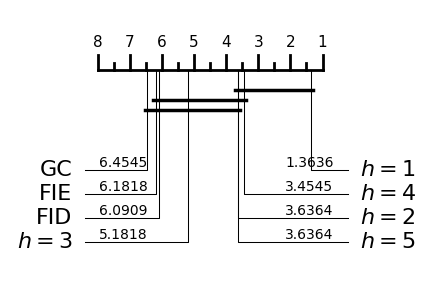

In [156]:
df0 = df.copy(deep=True)

df0 = df0[
    (df0.scaler.isin(['None', 'MinMaxScaler', 'StandardScaler']))
    & (df0.selection.isin([" 'cluster'", " 'random'"]))
    & (~df0.n_shapelets.isin(["inf"]))
    & (df0.n_shapelets.isin(['1000', '100']))
]

rename_dict={
    '1': '$h=1$',
    '2': '$h=2$',
    '3': '$h=3$',
    '4': '$h=4$',
    '5': '$h=5$',

    "'new'": 'GC',
    "'elbow'": 'FIE',
    "'drop'": 'FID',
}

df0.n_features_strategy = df0.n_features_strategy.map(rename_dict)

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'n_features_strategy', 'f1_macro_test')
plt.title('SelectableFeatures', fontsize=16)
plt.savefig("z_img_1Selective_selectableFeatures_F1.png", dpi=300, bbox_inches='tight', )
plt.show()

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'n_features_strategy', 'train_time', lower_better=True)
plt.title('')
plt.savefig("z_img_1Selective_selectableFeatures_traintime.png", dpi=300, bbox_inches='tight', )
plt.show()

In [34]:
df_aeon

,'drop','elbow','new',1,2,3,4,5
dataset,,,,,,,,
auction,11.780286,12.040268,10.610186,0.125700,21.517263,27.624731,1.009249,3.130476
bankMarketing,18.059647,11.958267,21.168334,0.081500,4.622500,204.083871,3.072254,4.863422
covertype,21.439067,25.379216,127.708663,0.159072,120.962992,350.836121,4.097829,316.250811
diabetes,12.036799,12.789269,16.068409,0.130962,0.210217,0.618985,0.182845,0.178018
ecoli,11.307761,10.567968,9.164302,1.480603,0.122370,0.134734,0.778882,0.421526
glass,8.459924,11.429911,9.710656,0.061134,0.148116,15.652548,80.580748,1.932991
home,11.777166,11.026839,19.417056,0.185063,0.398084,1.201546,0.695476,9.842085
magic,10.830049,9.270943,10.175090,0.076335,0.717297,3.846982,4.550460,4.982720
seeds,7.222017,6.001464,13.019983,0.047424,9.875549,0.516201,0.088974,2.153642


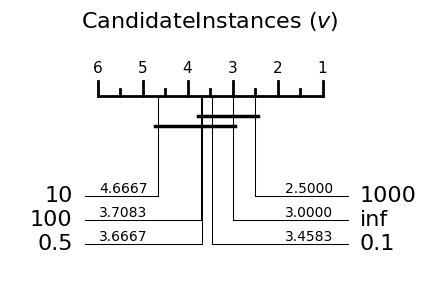

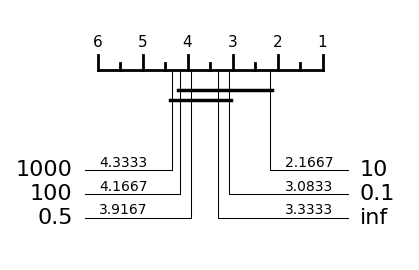

In [151]:
df0 = df.copy(deep=True)

df0 = df0[
    (df0.scaler.isin(['None', 'MinMaxScaler', 'StandardScaler']))
    & (df0.selection.isin([" 'cluster'", " 'random'"]))
    & (~df0.n_shapelets.isin(["inf"]))
    & (df0.n_shapelets.isin(['1000', '100']))
    & (df0.n_features_strategy.isin(["'elbow'"]))
]

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'n_ts_for_selection', 'f1_macro_test')
plt.title('CandidateInstances ($v$)', fontsize=16)
plt.savefig("z_img_1Selective_candidateInstances_F1.png", dpi=300, bbox_inches='tight', )
plt.show()

df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'n_ts_for_selection', 'train_time', lower_better=True)
plt.title('')
plt.savefig("z_img_1Selective_candidateInstances_traintime.png", dpi=300, bbox_inches='tight', )
plt.show()

dataset                          auction  bankMarketing  covertype  diabetes  \
             n_ts_for_selection                                                
n_nodes_test 0.1                       5              7          6         5   
             0.5                       6              6          6         7   
             10                        4              3          3         6   
             100                       7              4          3         5   
             1000                      7              7          6         7   
             inf                       6              6          6         6   

dataset                          ecoli  glass  home  iris  magic  seeds  \
             n_ts_for_selection                                           
n_nodes_test 0.1                     4      6     5     2      6      5   
             0.5                     7      7     6     2      6      4   
             10                      6      6     6     3      5      4   
             100                     7      7     7     3      6      5   
             1000                    6      7     7     3      6      5   
             inf                     6      7     7     3      7      5   

dataset                          titanic  vertebral  
             n_ts_for_selection                      
n_nodes_test 0.1                       5          6  
             0.5                       6          5  
             10                        6          5  
             100                       7          6  
             1000                      5          6  
             inf                       6          6

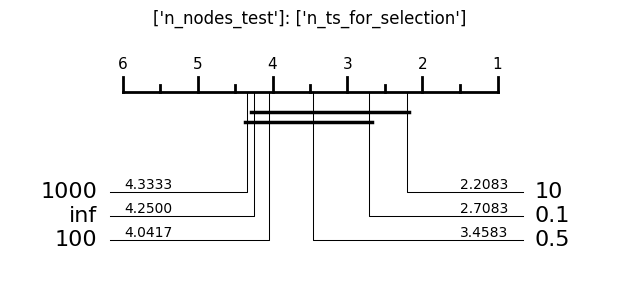

In [32]:
df_aeon, (fig, ax) = prepare_for_cd_plot(df0, 'f1_macro_val', 'n_ts_for_selection', 'n_nodes_test', lower_better=True, verbose=True)
plt.savefig("z_img_1Selective_candidateInstances_nodi.png", dpi=300, bbox_inches='tight', )
plt.show()